In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df_survey= pd.read_csv("Topic_Survey.csv")
df_survey.head()


,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [14]:
#df_survey.describe()

In [16]:
df_survey.rename(columns = {'Unnamed: 0': 'Data Science Subject'}, inplace = True)
df_survey.set_index('Data Science Subject', inplace = True)
df_survey.head()


,Very interested,Somewhat interested,Not interested
Data Science Subject,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [18]:
#df_survey.columns
result = df_survey
result = result.sort_values('Very interested', ascending=False)

num_cols = df_survey.select_dtypes(include=np.number)
sum = num_cols.sum(axis=0)
for col in num_cols.columns:
    df_survey[col] /= sum / 100
result.round(2)


,Very interested,Somewhat interested,Not interested
Data Science Subject,,,
Data Analysis / Statistics,77.01,20.26,2.74
Machine Learning,74.72,21.88,3.39
Data Visualization,61.58,33.73,4.69
Big Data (Spark / Hadoop),60.88,33.32,5.80
Deep Learning,58.23,35.50,6.27
Data Journalism,20.24,50.99,28.77


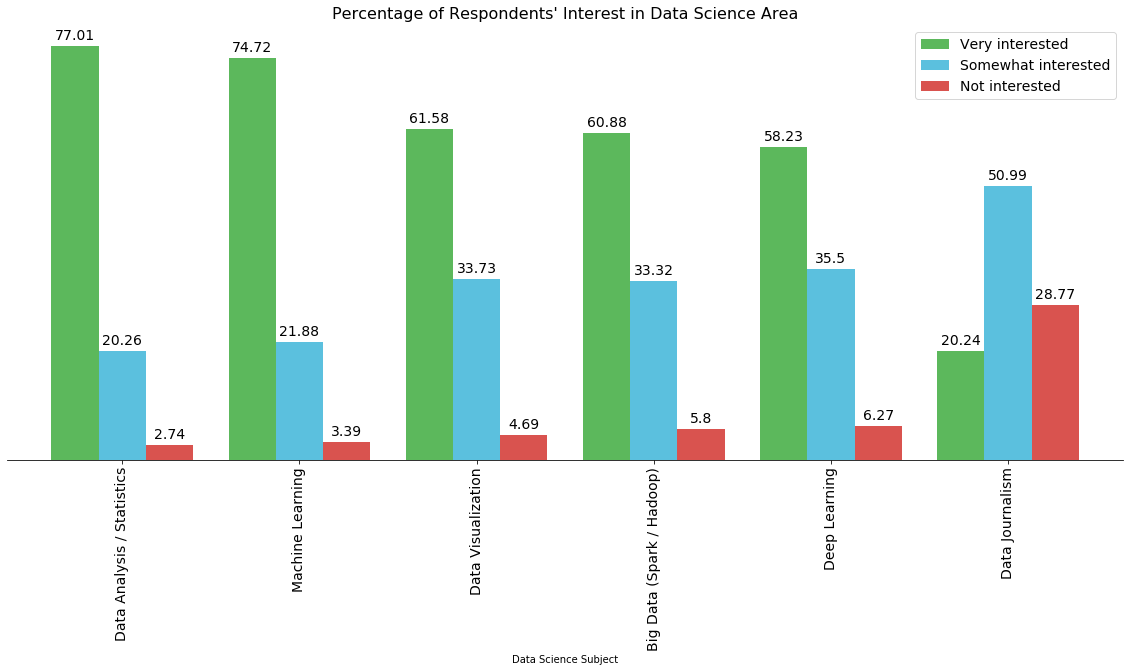

In [19]:
ax = result.plot(kind='bar', 
            figsize=(20, 8), 
            width=0.8, 
            color=['#5cb85c', '#5bc0de', '#d9534f'],
           )

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
ax.set_title("Percentage of Respondents' Interest in Data Science Area", fontsize=16)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )
plt.show()